tensor([[[ 85,  86,  88,  ...,  58,  60,  60],
         [ 88,  89,  89,  ...,  59,  60,  60],
         [ 86,  90,  92,  ...,  57,  55,  55],
         ...,
         [ 20,  24,  24,  ...,  12,  14,  15],
         [ 24,  24,  26,  ...,  16,  14,  14],
         [ 24,  27,  25,  ...,  15,  12,  12]],

        [[ 89,  90,  88,  ...,  68,  66,  67],
         [ 90,  91,  91,  ...,  70,  71,  71],
         [ 87,  91,  94,  ...,  73,  71,  73],
         ...,
         [ 18,  22,  22,  ...,  11,  12,  13],
         [ 21,  22,  24,  ...,  14,  12,  12],
         [ 21,  24,  23,  ...,  13,  10,  10]],

        [[150, 151, 148,  ..., 127, 124, 122],
         [149, 150, 150,  ..., 126, 125, 125],
         [144, 148, 151,  ..., 125, 122, 123],
         ...,
         [ 39,  43,  44,  ...,  25,  26,  27],
         [ 42,  43,  46,  ...,  28,  26,  25],
         [ 42,  45,  45,  ...,  27,  23,  23]]], dtype=torch.uint8)
tensor([[94, 95, 94,  ..., 71, 70, 70],
        [95, 96, 96,  ..., 72, 73, 73],
       

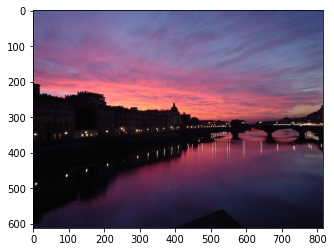

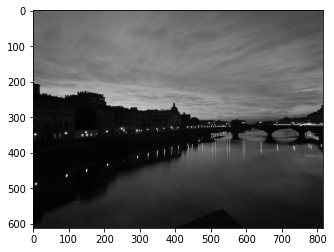

tensor([[[0.3333, 0.3373, 0.3451,  ..., 0.2275, 0.2353, 0.2353],
         [0.3451, 0.3490, 0.3490,  ..., 0.2314, 0.2353, 0.2353],
         [0.3373, 0.3529, 0.3608,  ..., 0.2235, 0.2157, 0.2157],
         ...,
         [0.0784, 0.0941, 0.0941,  ..., 0.0471, 0.0549, 0.0588],
         [0.0941, 0.0941, 0.1020,  ..., 0.0627, 0.0549, 0.0549],
         [0.0941, 0.1059, 0.0980,  ..., 0.0588, 0.0471, 0.0471]],

        [[0.3490, 0.3529, 0.3451,  ..., 0.2667, 0.2588, 0.2627],
         [0.3529, 0.3569, 0.3569,  ..., 0.2745, 0.2784, 0.2784],
         [0.3412, 0.3569, 0.3686,  ..., 0.2863, 0.2784, 0.2863],
         ...,
         [0.0706, 0.0863, 0.0863,  ..., 0.0431, 0.0471, 0.0510],
         [0.0824, 0.0863, 0.0941,  ..., 0.0549, 0.0471, 0.0471],
         [0.0824, 0.0941, 0.0902,  ..., 0.0510, 0.0392, 0.0392]],

        [[0.5882, 0.5922, 0.5804,  ..., 0.4980, 0.4863, 0.4784],
         [0.5843, 0.5882, 0.5882,  ..., 0.4941, 0.4902, 0.4902],
         [0.5647, 0.5804, 0.5922,  ..., 0.4902, 0.4784, 0.

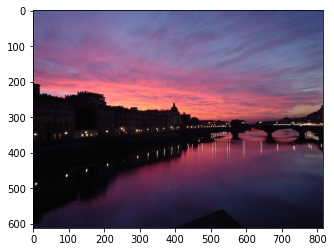

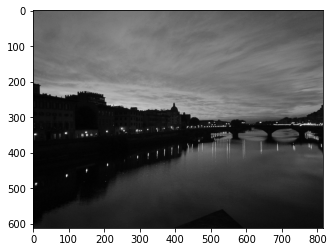

In [1]:
# -*- coding: utf-8 -*-
#%% Sample 2-1
#%% 画像データの入出力
# RGB-グレースケール変換 
# 
# 画像処理特論
# 
# 村松 正吾 
# 
# 動作確認: Python 3.7, PyTorch 1.8
#%% Input and output of images
# RGB to grayscale
# 
# Advanced Topics in Image Processing
# 
# Shogo MURAMATSU
# 
# Verified: Python 3.7, PyTorch 1.8
from PIL import Image
import requests
import torch
import torchvision
import torchvision.io
from matplotlib import pyplot as plt

#  準備 
# (Preparation)
# 
# 本サンプルで利用する画像でーがを収めたdata フォルダにパスをとおす。
# 
# Create a path to the data folder that contains images used in this sample.

#addpath('./data')
url = 'https://github.com/msiplab/AtipWork/raw/master/data/firenzeRgb.jpg'
totensor = torchvision.transforms.ToTensor()

# RGBからグレースケールへ
# (RGB to Grayscale)
# 
# RGB色空間からグレースケールへの変換の定義
# 
# Definition of conversion from RGB color space to grayscale.
# 
# $$x_\mathrm{Y} = 0.2989x_\mathrm{R}+0.5870x_\mathrm{G}+0.1140x_\mathrm{B}$$

# Importing color images
#pictureRgb = torchvision.io.read_image('./data/firenzeRgb.jpg')\
im2uint8 = torchvision.transforms.ConvertImageDtype(torch.uint8)
pictureRgb = im2uint8(totensor(Image.open(requests.get(url, stream=True).raw)))

# Conversion to grayscale
pictureGray = ( \
    0.2959 * pictureRgb[0,:,:].to(dtype=torch.double) + # R
    0.5870 * pictureRgb[1,:,:].to(dtype=torch.double) + # G
    0.1140 * pictureRgb[2,:,:].to(dtype=torch.double)   # B
).to(dtype=torch.uint8)
print(pictureRgb) 
print(pictureGray)
# uint8型画像の表示
# (Image show in uint8)
#%% 
# * RGBカラー画像(RGB color image)
# * グレースケール画像(Grayscale image)
topilimg = torchvision.transforms.ToPILImage()

plt.figure(1)
plt.imshow(topilimg(pictureRgb))
plt.figure(2)
print(pictureGray.size())
plt.imshow(topilimg(pictureGray),cmap='gray')
plt.show()
# RGB2GRAY関数
# (RGB2GRAY funciton)
# 
# 入出力のデータ型を保存するグレースケール変換関数
# 
# Grayscale conversion function to store input and output data types.
im2double = torchvision.transforms.ConvertImageDtype(torch.double)
rgb2gray = torchvision.transforms.Grayscale()

pictureRgbDouble = im2double(pictureRgb)
pictureGrayDouble = rgb2gray(pictureRgbDouble)
print(pictureRgbDouble)
print(pictureGrayDouble)
# double型画像の表示
# (Image show in double)
#%% 
# * RGBカラー画像(RGB color image)
# * グレースケール画像(Grayscale image)

plt.figure(3)
plt.imshow(topilimg(pictureRgbDouble))
plt.figure(4)
plt.imshow(topilimg(pictureGrayDouble),cmap='gray')
plt.show()
# 画像ビューアアプリ
# (Image viewer app)
#%% 
# * RGBカラー画像(RGB color image)
# * グレースケール画像(Grayscale image)

#imtool(pictureRgbDouble)
#imtool(pictureGrayDouble)
#%% 
# © Copyright, Shogo MURAMATSU, All rights reserved.
